In [1]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Product and category data
products = ["Laptop", "Mobile", "Headphones", "Keyboard", "Mouse", "Monitor"]
categories = ["Electronics", "Accessories"]

data = []

start_date = datetime(2024, 1, 1)

# Create 50 sales records
for i in range(1, 51):
    record = {
        "order_id": i,
        "order_date": start_date + timedelta(days=random.randint(0, 180)),
        "product": random.choice(products),
        "category": random.choice(categories),
        "quantity": random.randint(1, 5),
        "price": random.randint(500, 50000)
    }
    data.append(record)

# Create DataFrame
df = pd.DataFrame(data)

# View sample data
df.head()


,order_id,order_date,product,category,quantity,price
0,1,2024-05-30,Headphones,Accessories,5,24470
1,2,2024-06-22,Headphones,Electronics,4,8595
2,3,2024-03-27,Laptop,Electronics,4,41942
3,4,2024-05-15,Mouse,Accessories,3,19486
4,5,2024-01-23,Mouse,Electronics,5,40045


In [2]:
# Calculate total sales amount for each order
df["total_sales"] = df["quantity"] * df["price"]

# View the updated data
df.head()


,order_id,order_date,product,category,quantity,price,total_sales
0,1,2024-05-30,Headphones,Accessories,5,24470,122350
1,2,2024-06-22,Headphones,Electronics,4,8595,34380
2,3,2024-03-27,Laptop,Electronics,4,41942,167768
3,4,2024-05-15,Mouse,Accessories,3,19486,58458
4,5,2024-01-23,Mouse,Electronics,5,40045,200225


In [3]:
# Total number of orders
total_orders = df["order_id"].nunique()

# Total revenue
total_revenue = df["total_sales"].sum()

print("Total Orders:", total_orders)
print("Total Revenue:", total_revenue)


Total Orders: 50
Total Revenue: 3583541


In [4]:
# Product-wise sales analysis
product_sales = df.groupby("product")["total_sales"].sum().reset_index()

product_sales


,product,total_sales
0,Headphones,930061
1,Keyboard,345035
2,Laptop,515597
3,Mobile,684759
4,Monitor,292765
5,Mouse,815324


In [5]:
# Category-wise sales analysis
category_sales = df.groupby("category")["total_sales"].sum().reset_index()

category_sales


,category,total_sales
0,Accessories,1689526
1,Electronics,1894015


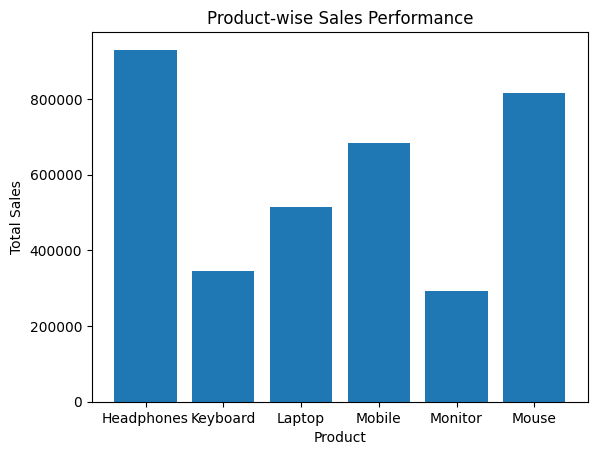

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(product_sales["product"], product_sales["total_sales"])
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.title("Product-wise Sales Performance")
plt.show()


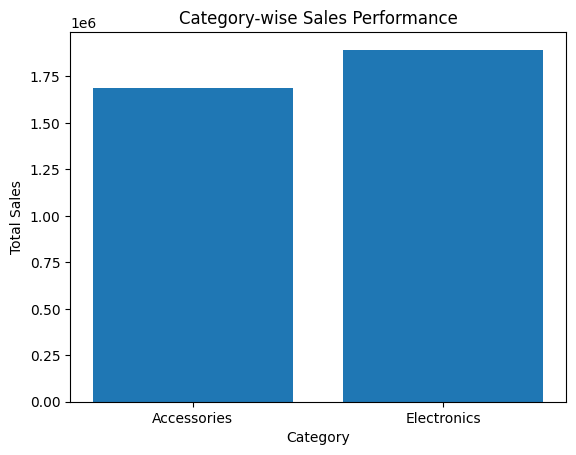

In [7]:
plt.figure()
plt.bar(category_sales["category"], category_sales["total_sales"])
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Category-wise Sales Performance")
plt.show()


In [8]:
# Ensure order_date is in datetime format
df["order_date"] = pd.to_datetime(df["order_date"])


In [9]:
# Create month column
df["month"] = df["order_date"].dt.to_period("M")


In [10]:
monthly_sales = df.groupby("month")["total_sales"].sum().reset_index()
monthly_sales


,month,total_sales
0,2024-01,707707
1,2024-02,607691
2,2024-03,815911
3,2024-04,39741
4,2024-05,738667
5,2024-06,673824


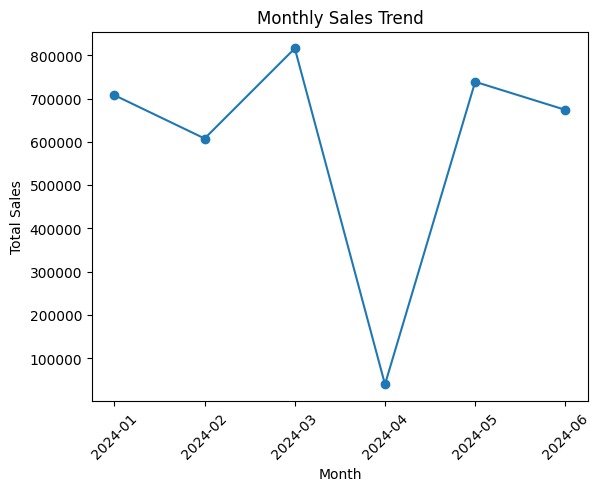

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(monthly_sales["month"].astype(str), monthly_sales["total_sales"], marker='o')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()


Business Summary

A sales dataset with 50 orders was created and analyzed.

Total revenue and total order count were calculated to understand overall business performance.

Product-wise analysis showed which products contribute the highest sales revenue.

Category-wise analysis helped identify the best-performing product category.

Monthly sales analysis revealed how sales vary over time and highlighted peak sales periods.

These insights can help the business improve inventory planning, promotions, and sales strategy.

In [13]:
# Export final dataset to CSV
df.to_csv("week2_sales_analysis_output.csv", index=False)

print("CSV file exported successfully!")


CSV file exported successfully!
